## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.


Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum.

## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.


## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discrete/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.

i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).


### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?



In [93]:
# necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [94]:
data= pd.read_csv('Advertising.csv') # Reading the data file
data.drop(columns = ["Unnamed: 0"],inplace = True)

In [95]:
data.head() # checking the first five rows from the dataset

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [96]:
data.shape ## printing the no. of columns and rows of the dataframe

(200, 4)

In [97]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [98]:
data.isnull().sum() # finding the count of missing values from different columns

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Now, let's showcase the relationship between the feature and target column

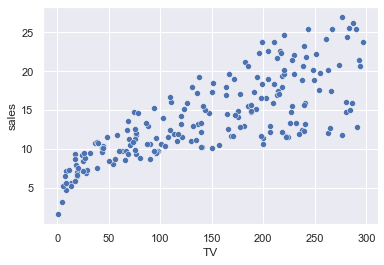

In [99]:
# visualize the relationship between the features and the response using scatterplots
sns.scatterplot(x='TV', y='sales', data = data)

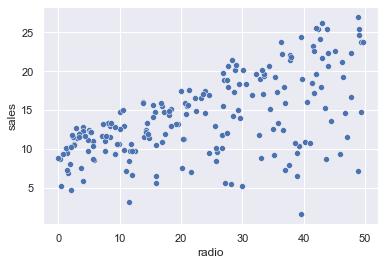

In [100]:
sns.scatterplot(x='radio', y='sales', data = data)

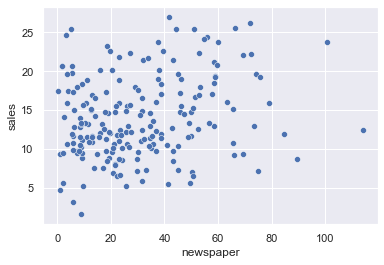

In [101]:
sns.scatterplot(x='newspaper', y='sales',data = data)

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad,  Radio ad and the sales is almost a linear one. A linear relationship typically looks like:
<img src="LinearGraph.png" width="300">

Hence, we can build a model using the Linear Regression Algorithm.


## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = c + mx$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $m$ is the coefficient of x
- $c$ is the intercept

$m$ and $c$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!


In [102]:
# create X and y
feature = ['TV']
X = data[feature]
y = data.sales

# follow the usual sklearn pattern
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X, y)

# print intercept and coefficients
print(lg.intercept_)
print(lg.coef_)

7.032593549127693
[0.04753664]


## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$


In [103]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [104]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [105]:
# use the model to make predictions on a new value
lg.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

In [106]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data['TV'].min(), data['TV'].max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [107]:
# make predictions for those x values and store them
preds = lg.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


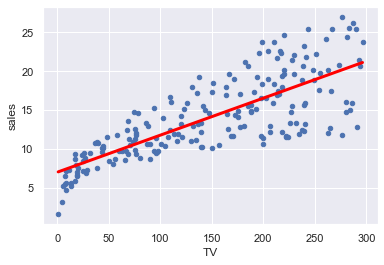

In [108]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=3)

In [109]:
# print the R-squared value for the model
lg.score(X,y)

0.611875050850071

Is it a "good" R-squared value?

### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [110]:
# create X and y
feature = ['TV', 'radio', 'newspaper']
X = data[feature]
y = data.sales

lg = LinearRegression()
lg.fit(X, y)

# print intercept and coefficients
print(lg.intercept_)
print(lg.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? 
If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

In [111]:
lg.score(X,y)

0.8972106381789522

What are the things to be learnt from this summary?

- The expenses on bot TV and Radio ads are**positively associated** with Sales, whereas the expense on newspaper ad is **slightly negatively associated** with the Sales.
- This model has a higher value of **R-squared** (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.


In [112]:
import statsmodels.formula.api as smf

In [113]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [114]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity (to control overfitting), but this again generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

a better approach to feature selection is **Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.


### Handling Categorical Predictors with Two Categories

Till now, all the predictors have been numeric. What if one of the predictors is categorical?

We’ll create a new feature called **Scale**, and shall randomly assign observations as **small or large**:


In [115]:
# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,TV,radio,newspaper,sales,Scale
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,large
4,180.8,10.8,58.4,12.9,large


In [116]:
data['Scale'].unique()

array(['large', 'small'], dtype=object)

For the scikit-learn library, all data must be represented **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a combination of binary value:

In [117]:
# create a new Series called IsLarge
data['IsSmall'] = data.Scale.map({'small':1, 'large':0})
data.head()

,TV,radio,newspaper,sales,Scale,IsSmall
0,230.1,37.8,69.2,22.1,large,0
1,44.5,39.3,45.1,10.4,small,1
2,17.2,45.9,69.3,9.3,small,1
3,151.5,41.3,58.5,18.5,large,0
4,180.8,10.8,58.4,12.9,large,0


Let's redo the multiple linear regression problem and include the **IsSmall** predictor:

In [118]:
# create X and y
feature = ['TV', 'radio', 'newspaper', 'IsSmall']
X = data[feature]
y = data.sales

# instantiate, fit
lg = LinearRegression()
lg.fit(X, y)

# print coefficients
i=0
for col in feature:
    print('The Coefficient of ',col, ' is: ',lg.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.04576576848174105
The Coefficient of  radio  is:  0.18799433963996337
The Coefficient of  newspaper  is:  -0.001287008845167581
The Coefficient of  IsSmall  is:  0.12970546714004494


### Handling Categorical variables with More than Two Categories

Let's create a new column called **Targeted Geography**, and randomly assign observations to be **rural, suburban, or urban**:


In [119]:
# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66

data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Scale,IsSmall,Targeted Geography
0,230.1,37.8,69.2,22.1,large,0,suburban
1,44.5,39.3,45.1,10.4,small,1,rural
2,17.2,45.9,69.3,9.3,small,1,rural
3,151.5,41.3,58.5,18.5,large,0,rural
4,180.8,10.8,58.4,12.9,large,0,rural


We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case.
Hence, we’ll create another **dummy variable**:


In [120]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Scale,IsSmall,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,230.1,37.8,69.2,22.1,large,0,suburban,1,0
1,44.5,39.3,45.1,10.4,small,1,rural,0,0
2,17.2,45.9,69.3,9.3,small,1,rural,0,0
3,151.5,41.3,58.5,18.5,large,0,rural,0,0
4,180.8,10.8,58.4,12.9,large,0,rural,0,0


What does the encoding say?
* rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
* suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
* urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1

Now the question is: **Why have we used two dummy columns instead of three?**

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the **dummy variable trap**. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns.
Let's include the two new dummy variables in the model:



In [121]:
# create X and y
feature = ['TV', 'radio', 'newspaper', 'IsSmall', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature]
y = data.sales

# instantiate, fit
lg = LinearRegression()
lg.fit(X, y)

# print coefficients
i=0
for col in feature:
    print('The Coefficient of ',col, ' is: ',lg.coef_[i])
    i=i+1

The Coefficient of  TV  is:  0.04592622840850647
The Coefficient of  radio  is:  0.18776698701162628
The Coefficient of  newspaper  is:  -0.0008124071795643784
The Coefficient of  IsSmall  is:  0.12229363136260642
The Coefficient of  Targeted Geography_suburban  is:  0.2719979830584939
The Coefficient of  Targeted Geography_urban  is:  0.33826865722640137


How do we interpret the coefficients?
- If all other columns are constant, the _suburban_  geography is associated with an average **decrease** of 106.56 widgets in sales for $1000 spent. 

- if $1000 is spent in an _urban_ geography, it amounts to an average **increase** in Sales of 268.13 widgets

**A final note about dummy encoding:** If we have categories that can be ranked (i.e., worst, bad, good, better, best), we can potentially represent them numerically  as (1, 2, 3, 4, 5) using a single dummy column


### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="ridge.PNG" width="300">

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

<img src="ridge_vs_lasso.PNG" width="300">

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="elasticNet.PNG" width="300">
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).


**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

No let's see the Python Implementation of these concepts:


In [122]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [123]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [124]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [125]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [126]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [127]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [128]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

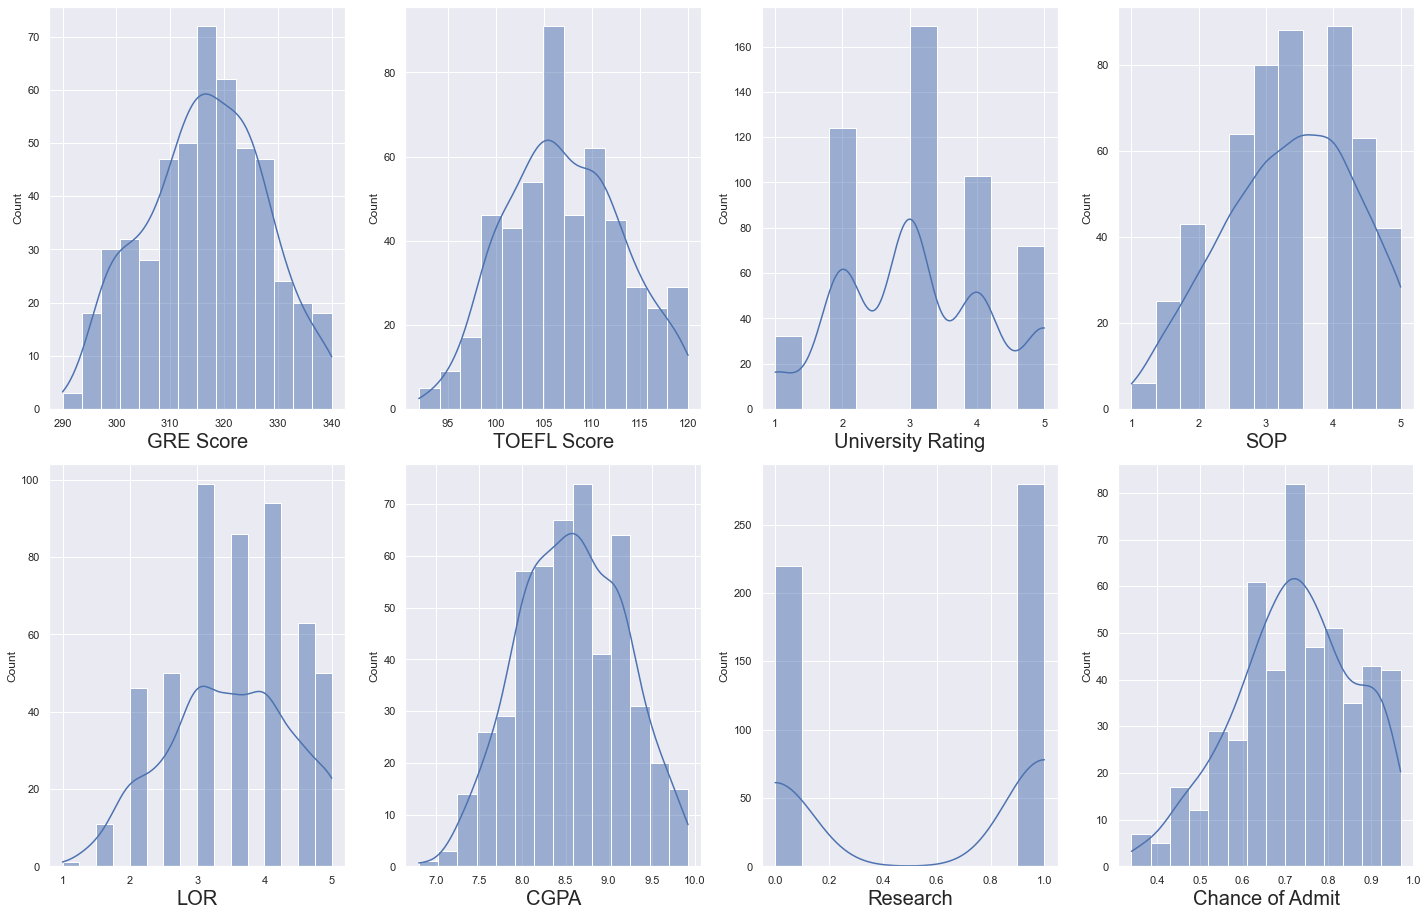

In [129]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=8 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [130]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

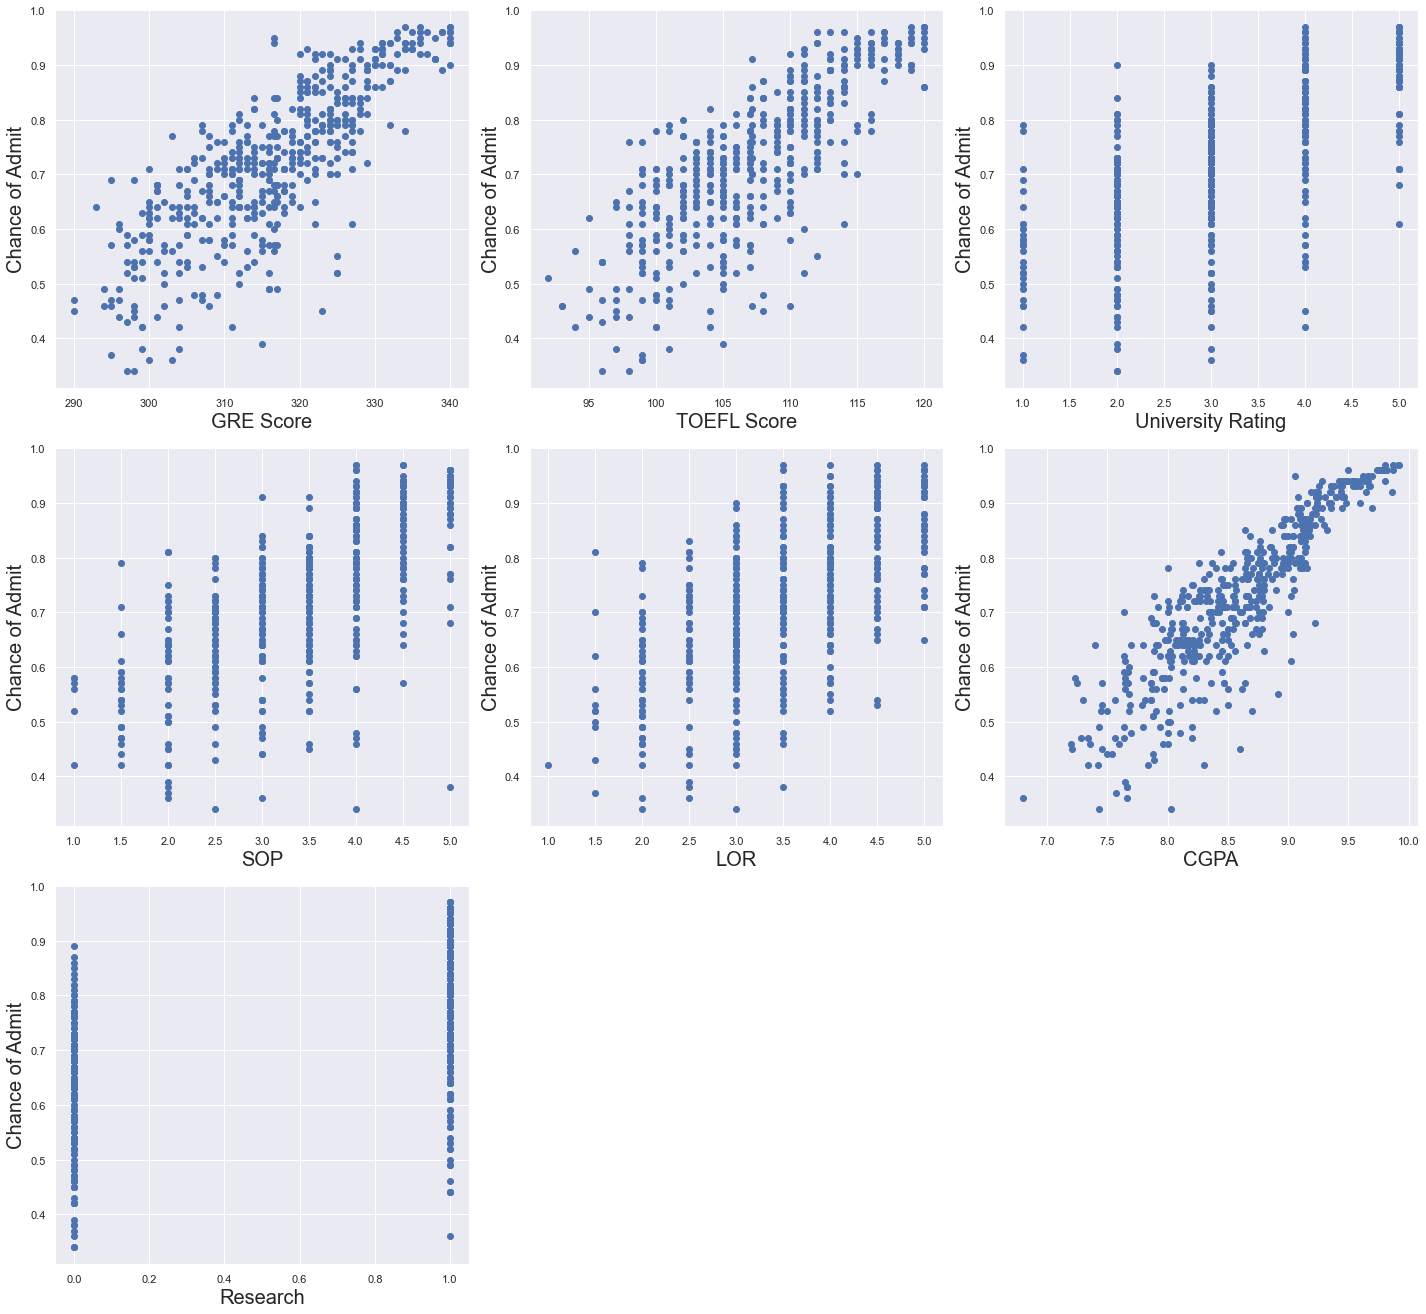

In [131]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [132]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [133]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [134]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [135]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [136]:
import pickle
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [137]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [138]:
regression.score(x_train,y_train)

0.8415250484247909

In [139]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [140]:
regression.score(x_test,y_test)

0.7534898831471069

In [141]:
adj_r2(x_test,y_test)

0.7387414146174466

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [142]:
prediction = regression.predict(x_test)

#### Create a dataframe that store the information of model

In [143]:
result = pd.DataFrame(index = ["intercept","w1","w2","w3","w4","w5","w6","w7","train adjacent R^2","test adjacent R^2","MSE","MAE"],columns = ["linear regression","LASSO","Ridge","Elastic net"])
result

,linear regression,LASSO,Ridge,Elastic net
intercept,NaN,NaN,NaN,NaN
w1,NaN,NaN,NaN,NaN
w2,NaN,NaN,NaN,NaN
w3,NaN,NaN,NaN,NaN
w4,NaN,NaN,NaN,NaN
w5,NaN,NaN,NaN,NaN
w6,NaN,NaN,NaN,NaN
w7,NaN,NaN,NaN,NaN
train adjacent R^2,NaN,NaN,NaN,NaN
test adjacent R^2,NaN,NaN,NaN,NaN


In [144]:
result["linear regression"]["intercept"] = regression.intercept_ 

In [145]:
result["linear regression"][["w1","w2","w3","w4","w5","w6","w7"]] = regression.coef_

In [146]:
result["linear regression"]["train adjacent R^2"] = adj_r2(x_train,y_train)

In [147]:
result["linear regression"]["test adjacent R^2"] = adj_r2(x_test,y_test)

In [148]:
result["linear regression"]["MSE"] = metrics.mean_absolute_error(y_test,prediction)
result["linear regression"]["MAE"] = metrics.mean_squared_error(y_test,prediction)

In [149]:
result

,linear regression,LASSO,Ridge,Elastic net
intercept,0.723205,NaN,NaN,NaN
w1,0.0233753,NaN,NaN,NaN
w2,0.0112696,NaN,NaN,NaN
w3,0.00431843,NaN,NaN,NaN
w4,0.00142731,NaN,NaN,NaN
w5,0.0148197,NaN,NaN,NaN
w6,0.0788343,NaN,NaN,NaN
w7,0.00987942,NaN,NaN,NaN
train adjacent R^2,0.838502,NaN,NaN,NaN
test adjacent R^2,0.738741,NaN,NaN,NaN


In [150]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [151]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [152]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [153]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [155]:
prediction = lasso_reg.predict(x_test)
prediction

array([0.42678904, 0.84095717, 0.63919002, 0.84957757, 0.97235869,
       0.67821714, 0.64475893, 0.51723403, 0.65649292, 0.43789891,
       0.82445362, 0.59924536, 0.7708834 , 0.7072115 , 0.66488546,
       0.66848988, 0.75980462, 0.6679427 , 0.58990611, 0.82881946,
       0.67243703, 0.76581247, 0.82109894, 0.56076427, 0.58866508,
       0.68437006, 0.48572298, 0.78550681, 0.78637006, 0.81977827,
       0.72923005, 0.97398006, 0.94555594, 0.72221699, 0.77810334,
       0.65628848, 0.85565204, 0.73249303, 0.66316218, 0.62177784,
       0.63972551, 0.62802324, 0.69245419, 0.61804806, 0.64194554,
       0.68292804, 0.59770693, 0.76515634, 0.73764789, 0.60577435,
       0.66908475, 0.77115677, 0.64567074, 0.92678253, 0.64902859,
       0.80624527, 0.50067091, 0.84499319, 0.75117106, 0.45923531,
       0.78746469, 0.57295818, 0.75360908, 0.65266863, 0.61516997,
       0.94433073, 0.62398957, 0.67796207, 0.86379464, 0.62834583,
       0.95649813, 0.95061286, 0.83032815, 0.53049496, 0.62691

#### Insert details of LASSO Model in dataframe

In [156]:
result["LASSO"]["intercept"] = lasso_reg.intercept_ 
result["LASSO"][["w1","w2","w3","w4","w5","w6","w7"]] = lasso_reg.coef_
result["LASSO"]["train adjacent R^2"] = lasso_reg.score(x_train, y_train)
result["LASSO"]["test adjacent R^2"] = lasso_reg.score(x_test, y_test)
result["LASSO"]["MSE"] = metrics.mean_absolute_error(y_test,prediction)
result["LASSO"]["MAE"] = metrics.mean_squared_error(y_test,prediction)

In [157]:
result

,linear regression,LASSO,Ridge,Elastic net
intercept,0.723205,0.723204,NaN,NaN
w1,0.0233753,0.0233761,NaN,NaN
w2,0.0112696,0.0112549,NaN,NaN
w3,0.00431843,0.00431106,NaN,NaN
w4,0.00142731,0.00142093,NaN,NaN
w5,0.0148197,0.0148057,NaN,NaN
w6,0.0788343,0.0788425,NaN,NaN
w7,0.00987942,0.00986242,NaN,NaN
train adjacent R^2,0.838502,0.841525,NaN,NaN
test adjacent R^2,0.738741,0.753465,NaN,NaN


In [158]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.42869413, 0.06756195, 6.61977978, 2.13967129, 3.03771843,
       7.6945395 , 8.80589349, 8.81470671, 5.50803814, 1.74735185,
       2.99777601, 6.97000723, 8.21065689, 6.49981966, 7.5441621 ,
       2.03083449, 7.19906437, 9.26107849, 9.37267665, 0.55447021,
       0.79948926, 5.95654569, 1.07365962, 2.07922645, 5.12457704,
       6.31521026, 1.19565671, 4.75294041, 5.58064161, 7.84374328,
       9.65448291, 0.9228074 , 0.96484607, 8.28841259, 4.63260673,
       6.45048552, 7.85413645, 7.75392049, 3.3961616 , 3.25327775,
       3.36546448, 0.14437505, 6.15826907, 9.29260839, 4.81069676,
       4.44221107, 9.14486418, 1.15208217, 1.85366047, 7.63271211]),
        cv=10, normalize=True)

In [159]:
ridgecv.alpha_

0.06756195355398509

In [160]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.06756195355398509)

In [161]:
ridge_model.score(x_test, y_test)

0.7535230146456973

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [162]:
prediction = ridge_model.predict(x_test)
prediction

array([0.42673169, 0.84097886, 0.63917138, 0.84958796, 0.97242265,
       0.67811552, 0.64469915, 0.5172043 , 0.6564435 , 0.43779865,
       0.82446041, 0.59928945, 0.77089783, 0.70722344, 0.66490387,
       0.6684041 , 0.7597718 , 0.66797234, 0.5898237 , 0.82878385,
       0.67248496, 0.76578849, 0.82108872, 0.56065035, 0.58862297,
       0.68435167, 0.48570428, 0.78540934, 0.78642398, 0.81977294,
       0.72916898, 0.97399761, 0.94562716, 0.72219376, 0.77814389,
       0.65628317, 0.85570621, 0.73253867, 0.66309745, 0.62172574,
       0.63972931, 0.62802298, 0.69250945, 0.61804623, 0.64187225,
       0.68303371, 0.59770036, 0.7651711 , 0.73749441, 0.60575133,
       0.66906883, 0.77120704, 0.64560526, 0.92684537, 0.64904196,
       0.80628155, 0.50066786, 0.84507437, 0.75115581, 0.45921231,
       0.78745423, 0.57289507, 0.75356229, 0.65271435, 0.61521962,
       0.94436406, 0.62396525, 0.67793686, 0.86381763, 0.62826196,
       0.95653241, 0.95062544, 0.83030003, 0.53046474, 0.62684

#### Insert details in RIDGE Model

In [163]:
result["Ridge"]["intercept"] = ridge_model.intercept_ 
result["Ridge"][["w1","w2","w3","w4","w5","w6","w7"]] = ridge_model.coef_
result["Ridge"]["train adjacent R^2"] = ridge_model.score(x_train, y_train)
result["Ridge"]["test adjacent R^2"] = ridge_model.score(x_test, y_test)
result["Ridge"]["MSE"] = metrics.mean_absolute_error(y_test,prediction)
result["Ridge"]["MAE"] = metrics.mean_squared_error(y_test,prediction)

In [164]:
result

,linear regression,LASSO,Ridge,Elastic net
intercept,0.723205,0.723204,0.723204,NaN
w1,0.0233753,0.0233761,0.0233849,NaN
w2,0.0112696,0.0112549,0.0112892,NaN
w3,0.00431843,0.00431106,0.00432552,NaN
w4,0.00142731,0.00142093,0.00144003,NaN
w5,0.0148197,0.0148057,0.0148222,NaN
w6,0.0788343,0.0788425,0.0787797,NaN
w7,0.00987942,0.00986242,0.00988224,NaN
train adjacent R^2,0.838502,0.841525,0.841525,NaN
test adjacent R^2,0.738741,0.753465,0.753523,NaN


In [165]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [166]:
elasticCV.alpha_

0.0011069728449315508

In [167]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [168]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [169]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639868

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

In [171]:
prediction = elasticnet_reg.predict(x_test)
prediction

array([0.42817209, 0.84030922, 0.63970398, 0.84897305, 0.9711592 ,
       0.67904944, 0.64543036, 0.51808313, 0.65690683, 0.43955124,
       0.82381238, 0.59938925, 0.77057711, 0.70713176, 0.66488278,
       0.66919637, 0.75957439, 0.66770853, 0.5906986 , 0.82855762,
       0.67224482, 0.76585084, 0.82079841, 0.56189012, 0.58942616,
       0.68464574, 0.48689858, 0.78567755, 0.7858566 , 0.81937348,
       0.72950047, 0.97293885, 0.94431419, 0.72261713, 0.77775885,
       0.65649832, 0.85481638, 0.73215027, 0.6639091 , 0.62231578,
       0.63978714, 0.62832633, 0.69226952, 0.61811983, 0.64231563,
       0.68270383, 0.59821353, 0.76515891, 0.73838583, 0.60609822,
       0.66945287, 0.77053731, 0.64638735, 0.92560685, 0.64934438,
       0.80553723, 0.50179632, 0.84424143, 0.75076673, 0.46047046,
       0.78753985, 0.57408108, 0.75386389, 0.65292118, 0.6151954 ,
       0.94343008, 0.6245577 , 0.67834921, 0.86311516, 0.62929278,
       0.95549948, 0.94968341, 0.82985423, 0.5314065 , 0.62775

#### Insert details of Elastic net model

In [172]:
result["Elastic net"]["intercept"] = elasticnet_reg.intercept_ 
result["Elastic net"][["w1","w2","w3","w4","w5","w6","w7"]] = elasticnet_reg.coef_
result["Elastic net"]["train adjacent R^2"] = elasticnet_reg.score(x_train, y_train)
result["Elastic net"]["test adjacent R^2"] = elasticnet_reg.score(x_test, y_test)
result["Elastic net"]["MSE"] = metrics.mean_absolute_error(y_test,prediction)
result["Elastic net"]["MAE"] = metrics.mean_squared_error(y_test,prediction)

In [173]:
result

,linear regression,LASSO,Ridge,Elastic net
intercept,0.723205,0.723204,0.723204,0.723193
w1,0.0233753,0.0233761,0.0233849,0.0233721
w2,0.0112696,0.0112549,0.0112892,0.0111123
w3,0.00431843,0.00431106,0.00432552,0.00421357
w4,0.00142731,0.00142093,0.00144003,0.00135439
w5,0.0148197,0.0148057,0.0148222,0.0145858
w6,0.0788343,0.0788425,0.0787797,0.0787961
w7,0.00987942,0.00986242,0.00988224,0.00958103
train adjacent R^2,0.838502,0.841525,0.841525,0.841499
test adjacent R^2,0.738741,0.753465,0.753523,0.75317


#### DATAFRAME Contain Information about each model

In [174]:
result.T

,intercept,w1,w2,w3,w4,w5,w6,w7,train adjacent R^2,test adjacent R^2,MSE,MAE
linear regression,0.723205,0.0233753,0.0112696,0.00431843,0.00142731,0.0148197,0.0788343,0.00987942,0.838502,0.738741,0.0495277,0.00490096
LASSO,0.723204,0.0233761,0.0112549,0.00431106,0.00142093,0.0148057,0.0788425,0.00986242,0.841525,0.753465,0.0495275,0.00490145
Ridge,0.723204,0.0233849,0.0112892,0.00432552,0.00144003,0.0148222,0.0787797,0.00988224,0.841525,0.753523,0.0495222,0.0049003
Elastic net,0.723193,0.0233721,0.0111123,0.00421357,0.00135439,0.0145858,0.0787961,0.00958103,0.841499,0.75317,0.0495035,0.00490733
